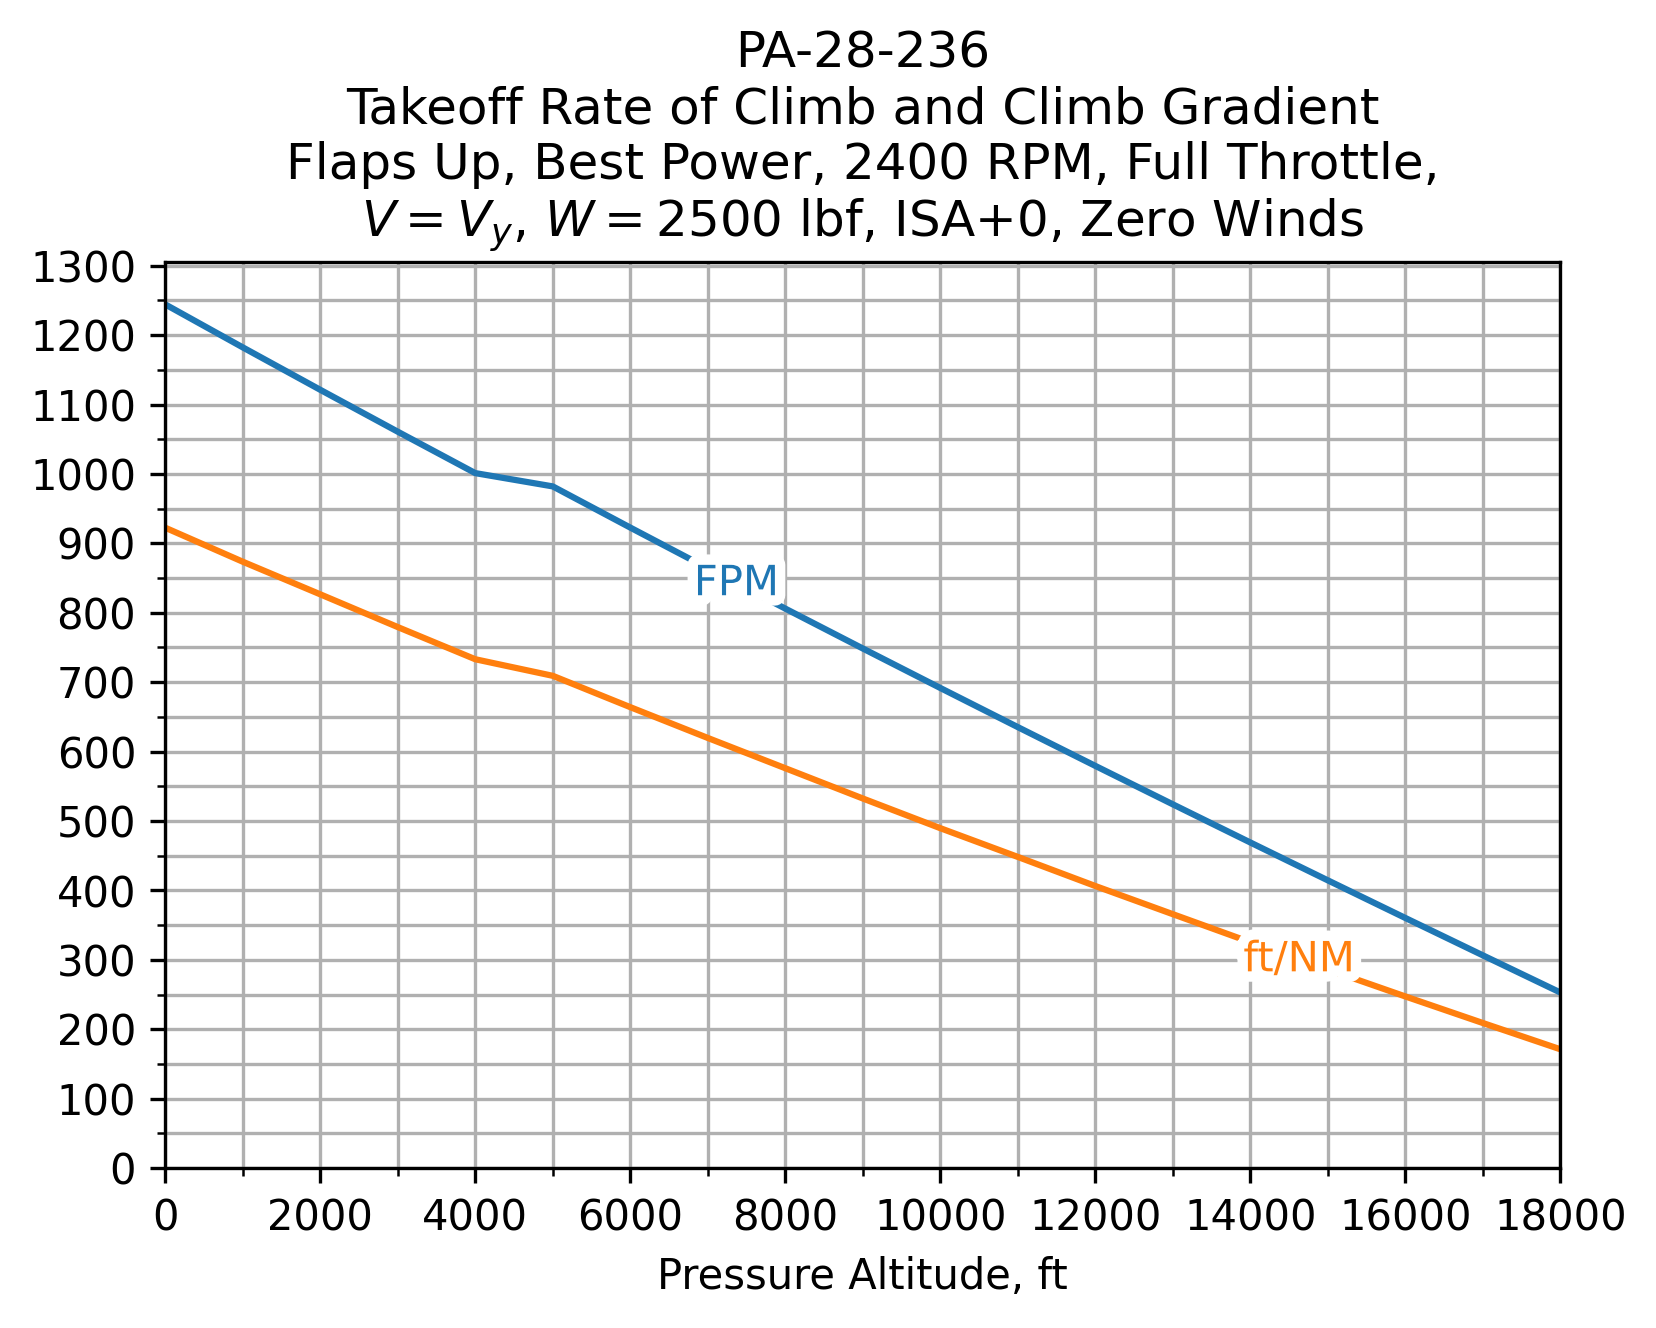

In [2]:
from examples.dakota_performance import best_rate_of_climb
from the_bootstrap_approach.performance import ByAltitudeRowIndex

%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from labellines import labelLines
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

from n51sw_dataplate import N51SW
from the_bootstrap_approach.mixture import Mixture


def takeoff_climb_performance_graph(mixture, gross_aircraft_weight, isa_diff=0):
    profile = best_rate_of_climb(N51SW, gross_aircraft_weight, isa_diff)
    pressure_altitude = profile.data[:, ByAltitudeRowIndex.PRESSURE_ALTITUDE]
    rate_of_climb = profile.data[:, ByAltitudeRowIndex.RATE_OF_CLIMB]
    angle_of_climb = profile.data[:, ByAltitudeRowIndex.FEET_PER_NAUTICAL_MILE]

    fig, ax = plt.subplots()

    ax.plot(pressure_altitude, rate_of_climb, label="FPM")
    ax.plot(pressure_altitude, angle_of_climb, label="ft/NM")

    labelLines(plt.gca().get_lines(), align=False, zorder=2.5)

    ax.set(
        xlabel="Pressure Altitude, ft",
        title=(
            "PA-28-236\n"
            "Takeoff Rate of Climb and Climb Gradient\n"
            f"{N51SW.configuration}, "
            f"{mixture.value}, "
            f"2400 RPM, "
            f"Full Throttle,\n"
            f"$V = V_y$, "
            f"$W = {gross_aircraft_weight}$ lbf, "
            f"ISA{isa_diff:+}, "
            f"Zero Winds"
        ),
    )

    ax.grid(True, which="both")

    ax.xaxis.set_major_locator(MultipleLocator(2000))
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))

    ax.yaxis.set_major_locator(MultipleLocator(100))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))

    ax.set_xlim([0, 18000])
    ax.set_ylim(bottom=0)

    fig.set(dpi=300)
    plt.show()


takeoff_climb_performance_graph(Mixture.BEST_POWER, 2500, isa_diff=0)